In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib

%matplotlib inline
from matplotlib import pyplot as plt

# import matplotlib.pyplot
from os import getcwd
getcwd()

'C:\\Users\\Alec\\Documents\\Programming_Resources\\Boot_Camp\\project-04\\CISautoData\\ipynb'

In [2]:
# data = pd.read_csv('https://raw.githubusercontent.com/HendersonAlec2212/project_04/main/csv/PICKUP_DATA_CLEAN.csv', low_memory=False)
df = pd.read_csv('../csv/PICKUP_DATA_CLEAN.csv')

In [3]:
df.head()

,body_class,brand_name,model_name,model_ID,model_year,mileage,ask_price,msrp,color,engine_cylinders,fuel_type_primary,vin
0,truck,FORD,F-250,1805.0,2017.0,19106,40962,40962,Ingot Silver Metallic,8.0,Diesel,bcd4bbecbba3b9ed2330d543abc3d90b997aa8fa6e628d...
1,truck,FORD,F-150,1801.0,2017.0,28194,28962,28962,Ingot Silver Metallic,6.0,Gasoline,a8f09496d9523e33ee3a8f885a475f5ef001d68a334c98...
2,truck,GMC,Sierra,1857.0,2017.0,7483,43962,43962,Crimson Red Tintcoat,8.0,Gasoline,c65dd3e96f4f68a0d4c7b09005273e0312295057c7c529...
3,truck,FORD,F-250,1805.0,2017.0,23881,38962,38962,Oxford White,8.0,Diesel,966168515802a7cf510d6c87a15cf71cc4385316a504c6...
4,truck,GMC,Canyon,4093.0,2017.0,6333,30962,30962,Onyx Black,6.0,Gasoline,9c7648c843035d0b46e9d716d947dfa3d0e8881054247a...


In [4]:
depth = 7
model_results = {}
train_score_list = []
test_score_list = []
df_test = df.drop(columns=['msrp','vin','color'])
#names for each DF/ Model to be trained


# divide the data
X = df_test.drop(columns=['ask_price'])
y = df_test['ask_price']

# set dummies
X_dummies = pd.get_dummies(X,drop_first=True)

# split for test and train
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=42)

# model parameters
model = RandomForestRegressor(max_depth=depth,n_estimators=100, random_state=12)

# fit the model to the data
model.fit(X_train, y_train)

# evaluate scores and predictions
train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)

train_score = model.score(X_train,y_train,sample_weight=None)
test_score = model.score(X_test,y_test,sample_weight=None)

# record results

model_results['model'] = model

model_results['train_y_pred'] = train_predicted
model_results['test_y_pred'] = test_predicted

model_results['train_score']  = train_score
model_results['test_score']  = test_score

train_score_list.append(train_score)
test_score_list.append(test_score)


In [5]:
model_results['columns'] = X_train.columns.to_list()

In [6]:
model_results

{'model': RandomForestRegressor(max_depth=7, random_state=12),
 'train_y_pred': array([35042.53345986, 26915.57876003, 17306.07071883, ...,
        31396.56378222, 31152.4935557 , 32983.41598369]),
 'test_y_pred': array([35150.48102991, 28002.11814061, 36106.03478037, ...,
        23018.56747505, 23916.17214639,  8737.83689792]),
 'train_score': 0.8024988218120399,
 'test_score': 0.7851446206812224,
 'columns': ['model_ID',
  'model_year',
  'mileage',
  'engine_cylinders',
  'brand_name_DODGE',
  'brand_name_FORD',
  'brand_name_GMC',
  'brand_name_HONDA',
  'brand_name_HUMMER',
  'brand_name_ISUZU',
  'brand_name_JEEP',
  'brand_name_LINCOLN',
  'brand_name_MAZDA',
  'brand_name_MITSUBISHI',
  'brand_name_NISSAN',
  'brand_name_RAM',
  'brand_name_TOYOTA',
  'model_name_2500',
  'model_name_3500',
  'model_name_B-Series',
  'model_name_Blackwood',
  'model_name_Canyon',
  'model_name_Colorado',
  'model_name_D-Series',
  'model_name_Dakota',
  'model_name_El Camino',
  'model_name_Ex

In [10]:
# save the model
model = model_results['model']
joblib.dump(model,'../models/trucks_depth_6_785_no_color.joblib')

['../models/trucks_depth_6_785_no_color.joblib']

In [11]:
loaded_model = joblib.load('../models/trucks_depth_6_785_no_color.joblib')

In [12]:
loaded_model.score(X_test,y_test,sample_weight=None)

0.7851446206812224

In [13]:
loaded_model.predict(X_test)

array([35150.48102991, 28002.11814061, 36106.03478037, ...,
       23018.56747505, 23916.17214639,  8737.83689792])

In [14]:
model_results['test_y_pred']

array([35150.48102991, 28002.11814061, 36106.03478037, ...,
       23018.56747505, 23916.17214639,  8737.83689792])

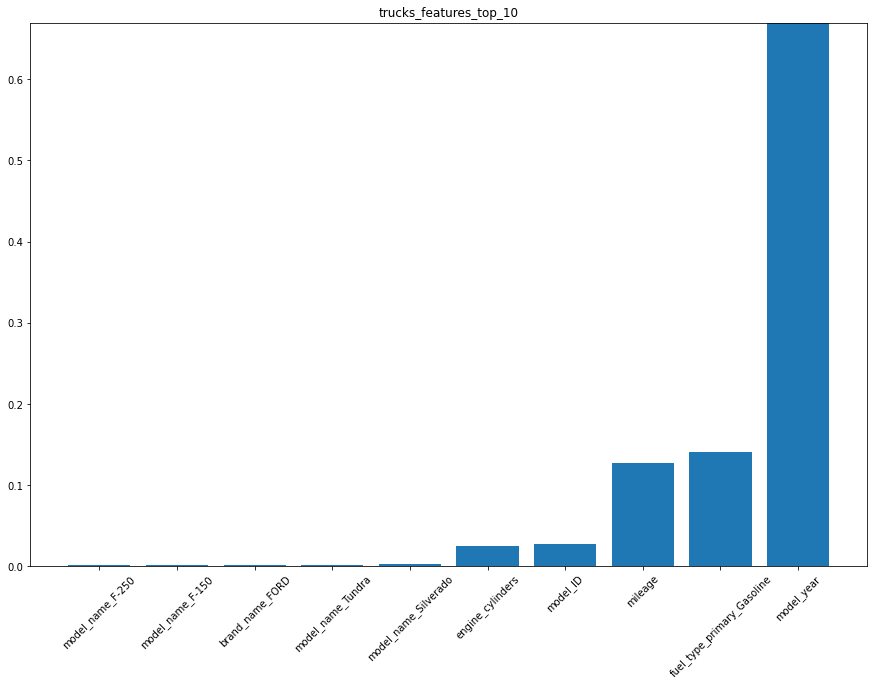

In [15]:
feature_importances = model.feature_importances_
features = sorted(zip(X_test.columns, model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features[-10:]]
width = [f[1] for f in features[-10:]]

fig, ax = plt.subplots()

fig.set_size_inches(15,10)
plt.margins(y=0.001)

plt.bar(x=cols, height=width)
plt.title('trucks_features_top_10')
plt.xticks(rotation=45)
plt.savefig('../visualizations/trucks_top_10_cols.png')
plt.show()


In [16]:
print(model_results['columns'])

['model_ID', 'model_year', 'mileage', 'engine_cylinders', 'brand_name_DODGE', 'brand_name_FORD', 'brand_name_GMC', 'brand_name_HONDA', 'brand_name_HUMMER', 'brand_name_ISUZU', 'brand_name_JEEP', 'brand_name_LINCOLN', 'brand_name_MAZDA', 'brand_name_MITSUBISHI', 'brand_name_NISSAN', 'brand_name_RAM', 'brand_name_TOYOTA', 'model_name_2500', 'model_name_3500', 'model_name_B-Series', 'model_name_Blackwood', 'model_name_Canyon', 'model_name_Colorado', 'model_name_D-Series', 'model_name_Dakota', 'model_name_El Camino', 'model_name_Explorer Sport Trac', 'model_name_F-150', 'model_name_F-150 Heritage', 'model_name_F-250', 'model_name_F-350', 'model_name_F-450', 'model_name_Frontier', 'model_name_GMT-400', 'model_name_Gladiator', 'model_name_H3T', 'model_name_Mark LT', 'model_name_Pick-Up', 'model_name_Raider', 'model_name_Ram', 'model_name_Ranger', 'model_name_Ridgeline', 'model_name_S-10 Pickup', 'model_name_SSR', 'model_name_Sierra', 'model_name_Sierra HD', 'model_name_Sierra Limited', 'mode